#**Gold Price Prediction**

In [32]:
# importing the dependencies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection

In [33]:
# loading the data into a pandas dataframe

gold_data = pd.read_csv('/content/gold_price_data.csv')

In [34]:
# finding the number of rows and columns in the dataset

gold_data.shape

(2290, 6)

In [35]:
# printing the first five rows from the dataset

gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [36]:
# finding if there're any null values / missing values

gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [37]:
# print the last five rows of the dataframe

gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [38]:
# getting some basic information about the dataset

gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [39]:
# getting the statistical measures of the dataset

gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation between features :

1. Positive Correlation

2. Negative Correlation

In [40]:
correlation = gold_data.corr()

<ipython-input-40-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

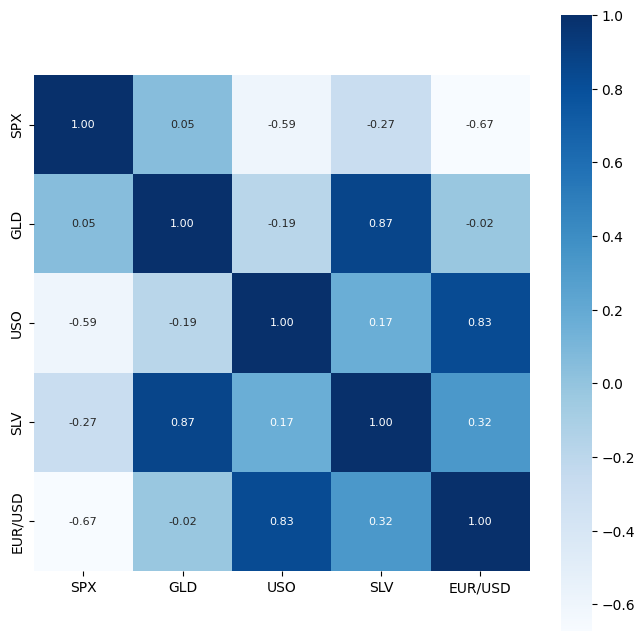

In [41]:
# constructing a heatmap to understand the correlation between the features

plt.figure(figsize = (8,8),)
sns.heatmap(correlation, cbar = True, square = True, fmt = '.2f', annot = True, annot_kws = {'size':8},cmap = 'Blues')

In [42]:
# correlation values of gld

print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-43-ed27c3846727>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

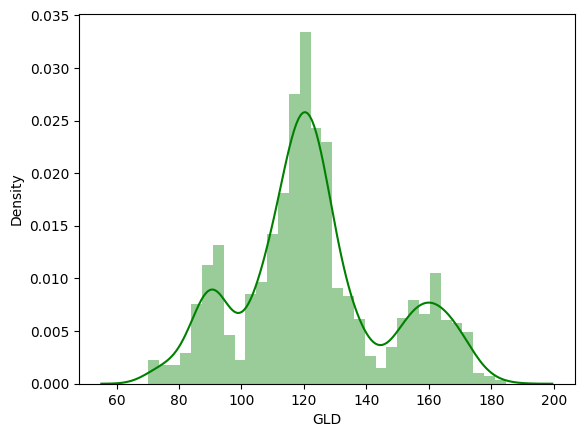

In [43]:
# checking the distribution of GLD prices - density

sns.distplot(gold_data['GLD'],color='green')

In [44]:
X = gold_data.drop(['Date','GLD'],axis = 1)
Y = gold_data['GLD']

In [45]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [46]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting the dataset

In [47]:
# Splitting the dataset into training data and test data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

Model Training

Random Forest Regressor

In [48]:
regressor = RandomForestRegressor(n_estimators = 100)

In [49]:
# trainig the model

regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [50]:
# Evaluating the model based on the test data

test_data_prediction = regressor.predict(X_test)

In [51]:
print(test_data_prediction)

[168.48409931  82.14309989 115.79840007 127.58700091 121.01400136
 154.56509812 150.08589841 126.15260008 117.52589864 126.07700064
 116.46940113 172.38170073 140.90499809 167.92879881 115.23270023
 117.84480082 141.01440263 169.90870185 159.72550297 158.96960042
 154.96790002 124.89800029 175.72249977 157.02920321 125.27320043
  93.8089997   77.60850034 120.21429997 119.08959921 167.52730052
  87.95780042 125.02210005  91.15870088 117.62530051 121.16369917
 136.77400046 115.64170129 115.01120045 147.11359983 107.2632013
 104.01290211  87.150198   126.36710085 118.09380025 152.52979922
 119.68860056 108.28330029 107.95229796  93.2296006  127.12609779
  74.83680043 113.64739938 121.11420012 111.44359908 118.94919908
 120.84409956 160.21269982 167.5691017  146.84549697  85.85959864
  94.37480024  86.77819869  90.53950009 118.82620083 126.42160059
 127.52089984 168.78619991 122.26169913 117.73429878  98.59010031
 167.69720168 142.58099785 132.19570256 121.19340248 120.9439992
 119.7714006

In [53]:
# R squared error

error_score = metrics.r2_score(Y_test,test_data_prediction)

In [54]:
print("R squared error : ",error_score)

R squared error :  0.9887312332867023


Compare the actual values and predicted values in a plot

In [55]:
Y_test = list(Y_test)

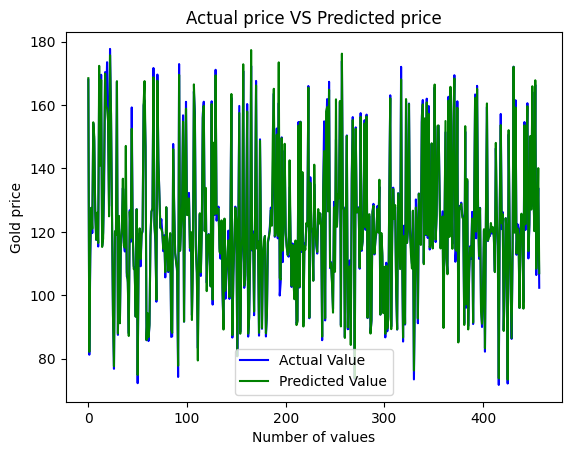

In [60]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title("Actual price VS Predicted price")
plt.xlabel("Number of values")
plt.ylabel("Gold price")
plt.legend()
plt.show()